In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

In [3]:
!pip install chardet

In [7]:
import chardet

with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

df = pd.read_csv("spam.csv", encoding=encoding)
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df=df.iloc[:,[0,1]]

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5572, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df.rename(columns ={"v1":"output","v2":"sms"},inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lb=LabelEncoder()
df["output"]=lb.fit_transform(df['output'])
df.head(3)

,output,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [16]:
lb.classes_

array(['ham', 'spam'], dtype=object)

In [17]:
df.duplicated().sum()

403

In [18]:
df.drop_duplicates(keep="first",inplace=True)
df.shape

(5169, 2)

In [19]:
df['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

In [20]:
import regex

In [21]:
df['num_characters']=df['sms'].apply(len)

In [22]:
df.head(2)

,output,sms,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_of_words']=df.apply(lambda row: len(nltk.word_tokenize(row['sms'])), axis=1)
df.head(2)

,output,sms,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [25]:
df['num_of_sentences']=df.apply(lambda row: len(nltk.sent_tokenize(row['sms'])), axis=1)
df.head(2)

,output,sms,num_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [26]:
df[['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
(df[df['output']==0][['num_characters','num_of_words','num_of_sentences']]).describe()

,num_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
(df[df['output']==1][['num_characters','num_of_words','num_of_sentences']]).describe()

,num_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

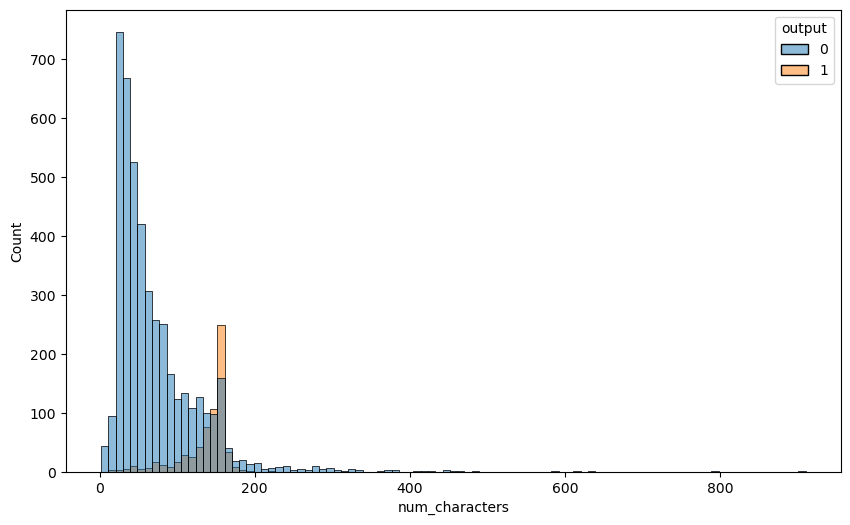

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='num_characters',hue='output')
plt.plot()

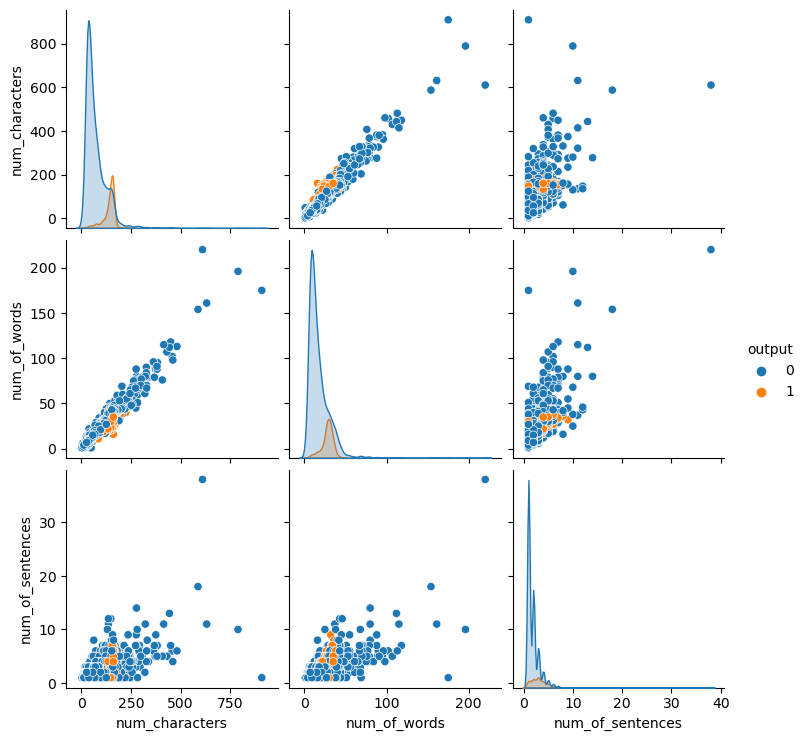

In [31]:
sns.pairplot(df,hue="output")

In [32]:
def lower_text(x):
  return x.lower()

In [33]:
df['sms']=df['sms'].apply(lower_text)

In [34]:
pattern = r'[^a-zA-Z0-9\s]'
df['sms'] = df['sms'].str.replace(pattern, '', regex=True)

In [35]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
def remove_stopwords(x):
  tex=[]
  for i in x.split(' '):
      if(i not in stopwords.words('english')):
        tex.append(i)
  return tex

In [37]:
df['transformed_txt']=df['sms'].apply(remove_stopwords)

In [38]:
from nltk.stem.porter import PorterStemmer

In [39]:
ps=PorterStemmer()

In [40]:
def stemming(x):
  tex=[]
  for i in x:
      tex.append(ps.stem(i))
  return " ".join(tex)

In [41]:
df['transformed_txt']=df['transformed_txt'].apply(stemming)

In [42]:
df.head()

,output,sms,num_characters,num_of_words,num_of_sentences,transformed_txt
0,0,go until jurong point crazy available only in ...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor u c already then say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,nah dont think goe usf live around though


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
cv=CountVectorizer()

In [45]:
x=cv.fit_transform(df['transformed_txt']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
y=df['output']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: output, Length: 5169, dtype: int32

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y)

In [49]:
X_train.shape

(3876, 7983)

In [50]:
Y_train.shape

(3876,)

In [51]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC

In [52]:
from sklearn.metrics import accuracy_score, precision_score

In [53]:
gnb=GaussianNB()
bnb=BernoulliNB()

In [54]:
gnb.fit(X_train,Y_train)
gnb_pred=gnb.predict(X_test)

In [55]:
print("Train Score: ",gnb.score(X_train,Y_train))
print("Test Score: ",accuracy_score(Y_test, gnb_pred))

Train Score:  0.9396284829721362
Test Score:  0.8692962103634957


In [56]:
bnb.fit(X_train,Y_train)
bnb_pred=bnb.predict(X_test)

print("Train Score: ",bnb.score(X_train,Y_train))
print("Test Score: ",accuracy_score(Y_test, bnb_pred))

Train Score:  0.9806501547987616
Test Score:  0.9667440061871616
